In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf

DecisionTreeClassifier(criterion='entropy')

In [9]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [10]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(83.7, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(251.10000000000002, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

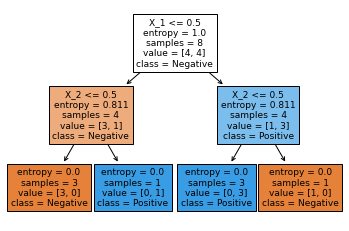

In [14]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

In [16]:
titanic_data = pd.read_csv('csv/titanic.csv')

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
X = titanic_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Survived'], axis=1)
y = titanic_data.Survived

In [26]:
X = pd.get_dummies(X)

In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [42]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [36]:
X = X.fillna({'Age' :X.Age.median()})

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


[Text(145.63624392667845, 212.004, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(54.05008833922262, 201.132, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]\nclass = Survived'),
 Text(20.111660777385158, 190.26, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(15.379505300353356, 179.388, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]\nclass = Survived'),
 Text(13.013427561837457, 168.516, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]\nclass = Survived'),
 Text(10.647349823321555, 157.644, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Survived'),
 Text(15.379505300353356, 157.644, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]\nclass = Survived'),
 Text(9.464310954063604, 146.772, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]\nclass = Survived'),
 Text(4.732155477031802, 135.9, 'Fare <= 13.75\nentropy = 0.592\ns

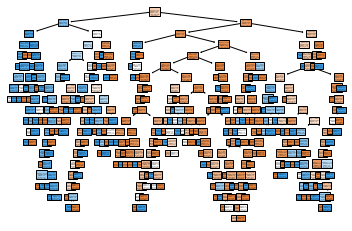

In [45]:
tree.plot_tree(clf,feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True,)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [52]:
X_test.shape

(295, 10)

In [53]:
X_train.shape

(596, 10)

In [54]:
X.shape

(891, 10)

In [67]:
clf.score(X, y)

0.9797979797979798

In [70]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [71]:
clf.score(X_test, y_test)

0.9966101694915255

In [98]:
#EXAMPLE
clf = tree.DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [75]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
clf.score(X_test, y_test)

0.7762711864406779

In [77]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [78]:
clf.score(X_test, y_test)

0.8101694915254237

In [79]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [80]:
clf.score(X_test, y_test)

0.7762711864406779

In [84]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8203389830508474

In [85]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7661016949152543

#1 That was better result with entropy.

In [88]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.823728813559322

In [121]:
max_depth_values = range(1, 100)

In [122]:
scores_data = pd.DataFrame()

In [123]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'depth' : [max_depth], 'train_score' : [train_score], 'test_score':[test_score], 
                                   'cross_validation':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [128]:
scores_data.head(10)

,depth,train_score,test_score,cross_validation
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392
0,6,0.867450,0.769492,0.803754
0,7,0.882550,0.779661,0.800378
0,8,0.907718,0.789831,0.800364
0,9,0.917785,0.800000,0.805392
0,10,0.926174,0.800000,0.796989


In [125]:
scores_data.test_score.max()

0.823728813559322

In [129]:
scores_data_long = pd.melt(scores_data, id_vars='depth', value_vars=['train_score', 'test_score', 'cross_validation'], 
                          var_name='set_type', value_name='score')

In [132]:
scores_data_long.head()

,depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [134]:
scores_data_long.query("set_type == 'cross_validation'")

,depth,set_type,score
198,1,cross_validation,0.781961
199,2,cross_validation,0.770196
200,3,cross_validation,0.790322
201,4,cross_validation,0.788627
202,5,cross_validation,0.800392
...,...,...,...
292,95,cross_validation,0.761793
293,96,cross_validation,0.768501
294,97,cross_validation,0.761779
295,98,cross_validation,0.763473


<AxesSubplot:xlabel='depth', ylabel='score'>

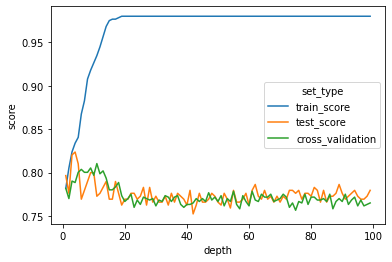

In [133]:
sns.lineplot(x='depth', y='score', hue='set_type', data=scores_data_long)


In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.75      , 0.77310924, 0.76470588, 0.78991597, 0.74789916])

In [118]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7651400560224089